## Assign Modularity

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load Username

In [ ]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","01_out","pemilu-at-kpu_id.csv"), usecols = ['text','username'])

In [ ]:
def unique_username(dataframe):
    dataframe = dataframe.str.lower()
    dataframe = dataframe.drop_duplicates()
    return dataframe.tolist()

unique_list = unique_username(df['username'])

### Replace id to username and Load Gephi Modularity

In [ ]:
modularity_df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","gephi","50-KCore_modularity.csv"))

In [ ]:
unique_id = list(map(str, range(0,len(unique_list))))

In [ ]:
modularity_df['Id'] = modularity_df['Id'].str.lstrip("'")
modularity_df['id'] = modularity_df['Id']
modularity_df['Id'] = modularity_df['Id'].replace(unique_id,unique_list)
modularity_df.rename(columns={"Id":"username"}, inplace=True)

In [ ]:
username_list = modularity_df['username'].tolist()
modularity_list = modularity_df['modularity_class'].tolist()
id_list = modularity_df['id'].tolist()

## Remove Tweet outside community

In [ ]:
removed_uninedexed = df
removed_uninedexed['username'] = removed_uninedexed['username'].str.lower()

In [ ]:
removed_unindexed = df[df['username'].isin(username_list)]
removed_indexed = removed_unindexed.reset_index(drop=True)

## Add modularity column

In [ ]:
removed_indexed['modularity'] = removed_indexed['username']
removed_indexed['node_id'] = removed_indexed['username']

In [ ]:
removed_indexed['modularity'] = removed_indexed['modularity'].replace(username_list, modularity_list)
removed_indexed['node_id'] = removed_indexed['node_id'].replace(username_list, id_list)

In [ ]:
removed_indexed.count()

In [ ]:
# Export to csv
removed_indexed.to_csv(os.path.join(os.pardir,os.pardir,"data","04_out","50-KCore-tweet.csv"), index=False)

## In Degree Distribution
http://www.indiana.edu/~pcl/rgoldsto/courses/social%20networks2.pdf  
Proving Power Law distribution properties in networks

In [ ]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data/gephi/InDegreeDistribution.csv"))

In [ ]:
power_law = df.groupby("indegree").agg("count")

In [ ]:
power_law.reset_index(inplace=True)

In [ ]:
# Proportion. Frequency / Total
power_law["Power Law"] = power_law["Id"].div(len(df.index))

## Line Plot

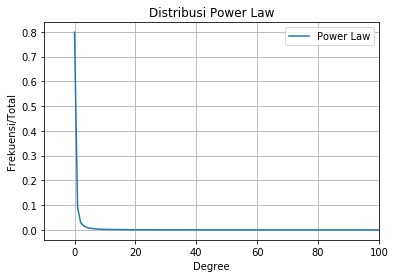

In [208]:
plot = power_law[["Power Law"]].plot(xlim=(-10,100),
                grid=True,
                title="Distribusi Power Law")
plot.set_xlabel("Degree")
plot.set_ylabel("Frekuensi/Total")
plt.show()
# plt.savefig(os.path.join(os.pardir,os.pardir,"data/04_out/longtail"),dpi=300)

## Scatter Plot

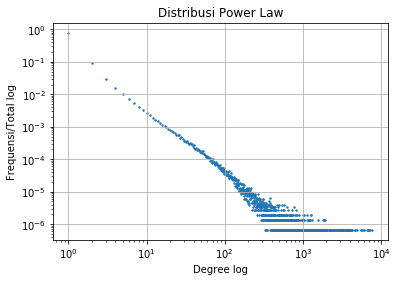

In [209]:
plot = power_law.plot.scatter(#xlim=(-10,100),
                x="indegree",
                y="Power Law",
                grid=True,
                title="Distribusi Power Law",
                loglog=True,
                s=[2]
                )
plot.set_xlabel("Degree log")
plot.set_ylabel("Frequensi/Total log")
plt.show()
# plt.savefig(os.path.join(os.pardir,os.pardir,"data/04_out/longtail_log"),dpi=300)